In [1]:
import pandas as pd
import tkinter as tk
from datetime import datetime
from tkinter import messagebox
from tkinter import filedialog
import io
import pyperclip
import webbrowser
import random

# Running Order Application
RO_app is a python program which lets the user generate "run times" for climbing competitions, specifically on-sight bouldering competitions.

## Installation
RO_app.exe can be downloaded from my GitHub. 

## Usage
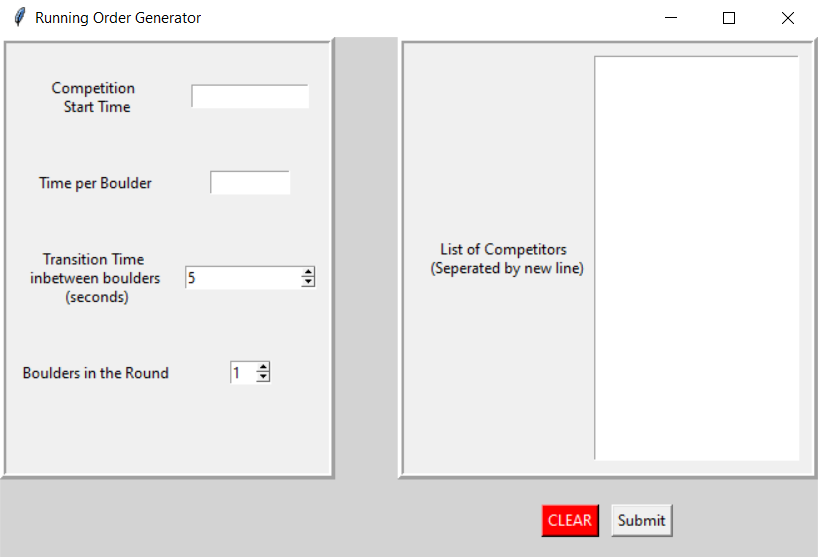

### Competition Start Time
This box accepts military time in the HH:MM Time format. This time determines when the first climber will being climbing.

### Time per Boulder
The alloted climbing time of the round. USA Climbing default is 4 minutes, written as 4:00. This accepts MM:SS Time format.

### Transition Time inbetween Boulders (seconds)
How many seconds will be given as a transition period, during this time nobody will be climbing. USA Climbing default is 15 seconds.

### Boulders in the Round
How many boulders will each competitor go through in their round.

### List of Competitors
List out Competitor names seperated by a new line. Each competitor in the list will be assigned a chair time, a start time, and an end time.

### Clear
The clear button will delete the entries in **Competition Start Time**, **Time per Boulder** and **List of Competitors**. It will retain the information in **Transition Time** and **Boulders in the Round**.

### Submit
Using the information entered, the program will open a new window showing a **Chair Time**, **Start Time** and **End Time**.

**<u>Project Goals</u>**
* Learn Object Oriented Programming by using Classes and Functions for project
* Learn how to make an interactable interface using Python.
* Be able to present project to BP.
* Program should be able to:
    * Have a changeable Start time. 
    * Have changable round length (default 4 minutes)
    * Changable transition time (default 15 seconds)
    * Be able to insert break times inbetween categories
    * <s>Autopopulate categories based on age groups</s>
    * <s>Able to customize age groups, default to USAC </s>
    * Change how many boulders in a round
    * Display start times for each competitor
    * Display start time for each boulder per competitor
    * Toggle to show what time competitor needs to be sitting in chair (1 round before their climb)
    * Be able to randomize order of competitors

**<u>Barebones Goals</u>**
* Start Time, Non-GUI &#x2705;
* Participant List &#x2705;
    * Right now it can handle importing a csv file, or by manual entry. Want it to obviously be able to handle other input types.
* Start/End Time for each climber &#x2705;
* <s>Categories or Age Groups</s> 
    * Don't think it needs age groups or categories. Instead, the user can just enter in each group as they need.. 
* What time each climber needs to be sitting in the ready-up chair. &#x2705;
* Layout for data to be shown and export formats &#x2705;
    * Columns for each climber:
        * Name, Chair Time, Boulder 1 Start, <s>Boulder 2 Start, Boulder 3 Start, Boulder 4 Start </s>, End Climbing

# ⚡⚡Things to work on⚡⚡
* Reorganize layout into Class format. Climber(Sex, Age, Category = none)
* Be able to print out each boulders start time
* Figure out a way to export directly into Excel/Sheets instead of saving file
* *CLEAR* button needs to delete any stored data so that new information can be saved


# Layout of The Process

## 1. <u>Defining the Problem</u>
"_Clearly understand the problem you're trying to solve. Identify the main functionalities and components required._" <br>

I want to create an application that we can use for our climbing team to generate running orders for both mock competitions, and actual competitions. Specifically in a USAC format where each climber has 4 minutes of climbing, and 4 minutes of resting before their next climb. It becomes a bit of a nightmare whenever we have to try to make these up on the spot so if we had a laptop that could run a program, it would solve these problems. <br>
I want to be able to generate orders based on a list of climbers that can be updated. The information should output into two different spreadsheets for readability, one for the start times on boulder 1, and finishing times for each climber on their final boulder (boulder 4).

## 2. <u>Identify Objects/Responsibilities</u>
"_Define the responsibilities and behaviors of each object. What does each object do, and how does it interact with others?_" <br>

## 3. <u>Consider Modularity</u>
"_Break down your program into smaller, manageable modules or components. Identify common functionalities that can be grouped._" <br>

## 4. <u>Understand Relationships</u>
"_Define the relationships between different objects and modules. Determine how they collaborate and share information._" <br>

## Old Code and Testing

In [3]:
#Eventually these will be able to be assigned by user input
transition_length = 15 #15 seconds
round_length = 240 #4 minutes as seconds
single_round = transition_length + round_length
competition_start = timeto_seconds(8, 0, 0)  #(single_round)     Time math accounted for so its easier to enter actual start time
boulders_per_round = 4

In [2]:
#Object Oriented Programming Classes
##Competitor Class
class Competitor:
    def __init__(self, name):
        self.name = name
        self.end_time = None

##Category Class
class Category:
    def __init__(self, name) -> None:
        self.name = name
        self.competitors = []
    
    def get_names():
        pass
        ''' #Retrieve text from the Competitorlist text box
        names_fromtext = txt_competlist.get('1.0', 'end').strip()
        names_list = names_fromtext.split('\n')
        names_list = [name.strip() for name in names_list if name.strip()]  #Filters out any empty strings

        return names_list'''


    def add_competitors(self, competitor):
        self.competitors.append(competitor)

    def generate_startend_times(self, start_time):
        current_time = start_time
        for climber in self.competitors:
            end_time = current_time + (single_round * ((boulders_per_round * 2) + 1) - transition_length) #Now accounts for variable boulders in round
            chairtime = current_time - single_round
            print(f"{climber.name} In the chair: {secondsto_time(chairtime)}, starts climbing: {secondsto_time(current_time)}, and ends climbing at {secondsto_time(end_time)}")
            current_time += (round_length + transition_length)

##Category Manager Class            
class CategoryManager:
    def __init__(self):
        self.categories = []

    def add_category(self, category_name):
        category = Category(category_name)
        self.categories.append(category)
        return category
    
    def display_categories(self):
        print('Current Categories: ')
        for category in self.categories:
            print(category.name)

    def category_info(self):
        for category in self.categories:
            print(f'Category: {category.name}')
            for competitor in category.competitors:
                print(f' - Competitor: {competitor.name}')
            print()

#Don't think I actually want a randomize button quite yet

#    def category_shuffle(self, category_name):
#        category = next((cat for cat in self.categories if cat.name == category_name))
#        if category is not None:
#            random.shuffle(category.competitors)
#            print(f'{category.name} category has been shuffled.')
#        else:
#            print(f'{category_name} not found.')
        



In [6]:
#Testing category manager with imported names from a list
cat_manager = CategoryManager()
cat1 = cat_manager.add_category('Male')
cat2 = cat_manager.add_category('Female')

climb_list = pd.read_csv('sample.csv')
climber_list = climb_list['participant_name']
for name in climber_list:
    cat_manager.categories[0].add_competitors(Competitor(name))

cat_manager.category_info()

Category: Male
 - Competitor: Climber1
 - Competitor: Climber2
 - Competitor: Climber3
 - Competitor: Climber4
 - Competitor: Climber5
 - Competitor: Climber6
 - Competitor: Climber7
 - Competitor: Climber8
 - Competitor: Climber9
 - Competitor: Climber10
 - Competitor: Climber11
 - Competitor: Climber12

Category: Female



In [13]:
# Creating list of climbers from csv file
'''climb_list = pd.read_csv('sample.csv')
climber_list = climb_list['participant_name']
second_category = Category('cat2')'''
Male = Category('Male')
for climber in climber_list:
    Male.add_competitors(Competitor(climber))

Male.generate_startend_times(competition_start)

Climber1 In the chair: 07:55:45, starts climbing: 08:00:00, and ends climbing at 08:38:00
Climber2 In the chair: 08:00:00, starts climbing: 08:04:15, and ends climbing at 08:42:15
Climber3 In the chair: 08:04:15, starts climbing: 08:08:30, and ends climbing at 08:46:30
Climber4 In the chair: 08:08:30, starts climbing: 08:12:45, and ends climbing at 08:50:45
Climber5 In the chair: 08:12:45, starts climbing: 08:17:00, and ends climbing at 08:55:00
Climber6 In the chair: 08:17:00, starts climbing: 08:21:15, and ends climbing at 08:59:15
Climber7 In the chair: 08:21:15, starts climbing: 08:25:30, and ends climbing at 09:03:30
Climber8 In the chair: 08:25:30, starts climbing: 08:29:45, and ends climbing at 09:07:45
Climber9 In the chair: 08:29:45, starts climbing: 08:34:00, and ends climbing at 09:12:00
Climber10 In the chair: 08:34:00, starts climbing: 08:38:15, and ends climbing at 09:16:15
Climber11 In the chair: 08:38:15, starts climbing: 08:42:30, and ends climbing at 09:20:30
Climber1

In [5]:
#Needed constants
transition_length = 15 #15 seconds
round_length = 240 #4 minutes as seconds
single_round = transition_length + round_length

#Creating Lists of Climbers
cat1 = ['Climber A', 'Climber B', 'Climber C', 'Climber D']
cat2 = ['Climber E', 'Climber F', 'Climber G', 'Climber H']

first_category = Category('Cat1')

for climber in cat1:
    first_category.add_competitors(Competitor(climber))

first_category.generate_startend_times(competition_start)
    

Climber A starts climbing at 08:00:00 and ends climbing at 08:38:00
Climber B starts climbing at 08:04:15 and ends climbing at 08:42:15
Climber C starts climbing at 08:08:30 and ends climbing at 08:46:30
Climber D starts climbing at 08:12:45 and ends climbing at 08:50:45


# Main Code Block

In [ ]:
#Main Codeblock for Application
#Competitor Class
class Competitor:
    def __init__(self, name):
        self.name = name
        self.end_time = None

##Category Class
class Category:
    def __init__(self):
        self.competitors = []

    def add_competitor(self, competitor):
        self.competitors.append(competitor)

# global variables
df = pd.DataFrame(columns=['Climber', 'In the chair', 'Starts Climbing', 'Ends Climbing'])

#Creating global functions to convert to and from a Seconds based timescale.
def secondsto_time(input_seconds):      #Turns seconds into a normal display of time
    hours = input_seconds // 3600
    minutes = (input_seconds % 3600) // 60
    seconds = input_seconds % 60
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

def timeto_seconds(hour = 0, minute = 0, second = 0):   #Turns Normal display of time into seconds
    hourseconds = (hour * 60) * 60
    minuteseconds = minute * 60
    totalseconds = second + minuteseconds + hourseconds
    return totalseconds

#Generating the times for each climber
def generate_startend_times(category):
    global txt_printedinfo
    global df
    current_time = convert_starttime()
    round_length = get_boulderlength()
    transition_length = get_transtime()
    boulders_per_round = get_numofboulders()
    single_round = round_length + transition_length
    info = ""
    for climber in category.competitors:
        end_time = current_time + (single_round * ((boulders_per_round * 2) + 1) - transition_length) #Now accounts for variable boulders in round
        chairtime = current_time - single_round
        #Add row to Dataframe
        df.loc[len(df)] = [climber.name,
                           secondsto_time(chairtime),
                           secondsto_time(current_time),
                           secondsto_time(end_time)]
                        
        info += f"{climber.name} In the chair by {secondsto_time(chairtime)}, starts climbing at {secondsto_time(current_time)}, and ends climbing at {secondsto_time(end_time)}\n"
        #Adds time, loops back through
        current_time += (round_length + transition_length)
    if txt_printedinfo:
        txt_printedinfo.insert(tk.END, info)
    else:
        print("Error: txt_printedinfo is not defined")


#Popup Messages
class PopupMessage:
    @staticmethod
    def starttime_error():
        messagebox.showinfo("Time Error", "Please use military time format\nfor time entries\nExample: 13:45")

    @staticmethod
    def boulderlength_error():
        messagebox.showinfo("Time Error", "Please use MM:SS format\nExample: 4:15 = 4 minutes 15 seconds")

    @staticmethod
    def complist_error():
        messagebox.showinfo("List Error", "Please provide at least one competitor\nin the List of Competitors field")

    @staticmethod
    def sucess_copy():
        messagebox.showinfo('Sucess', 'Text copied to clipboard!')
    
    @staticmethod
    def fail_copy():
        messagebox.showinfo('Warning', 'There was an error and text did not copy')

#Functions to gather information from the user
def create_dataframe():
    df = pd.DataFrame(columns=['Climber', 'In the chair', 'Starts Climbing', 'Ends Climbing'])       

def get_info():
    #Gathering all fields before processing information
    convert_starttime()
    get_boulderlength()
    get_transtime()
    get_numofboulders()
    competitors = get_names()
    category = Category()
    for competitor in competitors:
        category.add_competitor(competitor)

    generate_startend_times(category)

def convert_starttime():
    time_start = ntry_compstart_time.get()
    try:
        time_obj = datetime.strptime(time_start, "%H:%M")
        hour = time_obj.hour
        minute = time_obj.minute
        convert_seconds = int(timeto_seconds(hour, minute))
        #print(f'{hour} hours {minute} minutes, is equal to {convert_seconds} seconds')
        return convert_seconds
    except ValueError:
        PopupMessage.starttime_error()

def get_boulderlength():
    boulderlength = ntry_roundlength.get()
    try:
        time_split = datetime.strptime(boulderlength, "%M:%S")
        hour = 0
        minute = time_split.minute
        second = time_split.second
        converted_seconds = int(timeto_seconds(hour, minute, second))
        return converted_seconds
    except ValueError:
        PopupMessage.boulderlength_error()

def get_transtime(transition_length= 15):
    transition_length = int(spnbx_transtime.get())
    return transition_length

def get_numofboulders(numofboulders= 4):
    numofboulders = int(spnbx_numofboulders.get())
    return numofboulders
    
def get_names():
    #Retrieve text from the Competitorlist text box
    names_fromtext = txt_competlist.get('1.0', 'end').strip()
    names_list = names_fromtext.split('\n')
    names_list = [name.strip() for name in names_list if name.strip()]  #Filters out any empty strings
    if not names_list:
        PopupMessage.complist_error()
    else:
        competitors = [Competitor(name) for name in names_list]
        return competitors
    
#Button functions for the new window
def copy_to_clipboard():
    text_to_copy = txt_printedinfo.get('1.0', 'end-1c')
    if text_to_copy:
        pyperclip.copy(text_to_copy)
        PopupMessage.sucess_copy()
    else:
        PopupMessage.fail_copy()

def saveas_csv():
    file_path = filedialog.asksaveasfilename(defaultextension='.csv', filetypes=[('CSV files', '*.csv')])
    if file_path:
        df.to_csv(file_path, index= False)

def copy_csv():
    csv_data = df.to_csv(index=False)
    pd.read_csv(io.StringIO(csv_data)).to_clipboard(index=False, sep= ',')  #seperated by comma
    if csv_data:
        PopupMessage.sucess_copy()
    else:
        PopupMessage.fail_copy()

def clear_button():
    #Clears entry widgets
    ntry_compstart_time.delete(0, 'end')
    ntry_roundlength.delete(0, 'end')
    txt_competlist.delete('1.0', 'end')

def random_button():
    names_fromtext = txt_competlist.get('1.0', 'end').strip()
    names_list = names_fromtext.split('\n')
    random.shuffle(names_list)
    
    txt_competlist.delete('1.0', 'end')
    for name in names_list:
        txt_competlist.insert('end', name + '\n')

def open_timer():
    url = 'https://www.intervaltimer.com/create/hiit-timer'
    webbrowser.open(url)
    
#Functions for opening new windows, for printed info and CSV info
def open_printed_window():
    global txt_printedinfo
    printed_window = tk.Toplevel(window)
    printed_window.title("Running Order Information")
    printed_window.geometry('800x600')
    #Add widgets to the window here
    fme_printedinfo = tk.Frame(master= printed_window, bg= 'lightgrey')
    fme_printedinfo.pack(expand= True, fill= tk.BOTH, padx= 5, pady= 20)

    txt_printedinfo = tk.Text(master= fme_printedinfo)
    txt_printedinfo.grid(row= 0, column= 0, padx= 5, pady= 20, sticky= 'nsew')

    fme_printedinfo_btns = tk.Frame(master= fme_printedinfo)
    fme_printedinfo_btns.grid(row= 1, column= 0, sticky= 'nsew')

    btn_printedinfo_copy = tk.Button(fme_printedinfo_btns, text='Copy to Clipboard', command= copy_to_clipboard)
    btn_printedinfo_copy.grid(row= 0, column= 0, padx= 5)

    btn_printedinfo_view = tk.Button(fme_printedinfo_btns, text= 'Save as CSV file\n(for exporting to excel/sheets)', command= saveas_csv)
    btn_printedinfo_view.grid(row= 0, column= 1, padx= 5)

    btn_printedinfo_save = tk.Button(fme_printedinfo_btns, text= 'Copy CSV to clipboard', command= copy_csv)
    btn_printedinfo_save.grid(row= 0, column= 2, padx= 5)

    btn_openbrowser = tk.Button(fme_printedinfo_btns, text= 'Create Timer', command= open_browser)
    btn_openbrowser.grid(row= 1, column= 1)

    fme_printedinfo.rowconfigure(0, weight= 1)
    fme_printedinfo.columnconfigure(0, weight= 1)
    fme_printedinfo_btns.columnconfigure(0, weight= 1)
    fme_printedinfo_btns.columnconfigure(1, weight= 1)
    fme_printedinfo_btns.columnconfigure(2, weight= 1)

#Setting up layout for application
window = tk.Tk()
window.title('Running Order Generator')

fme_main = tk.Frame(master= window, width=1000, height= 600, bg= 'lightgrey')
fme_main.pack(expand= True, fill=tk.BOTH)
txt_printedinfo = None

fme_timeentry = tk.Frame(master= fme_main, relief= 'ridge', borderwidth= 5, padx= 5, pady= 5)
fme_timeentry.grid(row=0, column= 0, sticky= 'nsew')

fme_competitors = tk.Frame(master= fme_main, relief= 'ridge', borderwidth= 5, padx= 10, pady= 10)
fme_competitors.grid(row= 0, column= 2, sticky= 'nsew')

fme_buttons = tk.Frame(master= fme_main, bg= 'lightgrey')
fme_buttons.grid(row= 2, column= 2)

#Column Weights
fme_main.grid_columnconfigure(0, weight= 1, minsize= 50)
fme_main.grid_columnconfigure(1, weight= 2, minsize= 50)

#Start Time Entry
lbl_compstart_time = tk.Label(master= fme_timeentry, text= 'Competition \n Start Time')
lbl_compstart_time.grid(row= 0, column= 0, padx=5, pady=20)

ntry_compstart_time = tk.Entry(master= fme_timeentry, width= 15)
ntry_compstart_time.grid(row= 0, column= 1, padx=5, pady=5)

#Round Length Entry
lbl_roundlength = tk.Label(master= fme_timeentry, text='Time per Boulder')
lbl_roundlength.grid(row= 2, column= 0, padx=5, pady=20)

ntry_roundlength = tk.Entry(master=fme_timeentry, width= 10)
ntry_roundlength.grid(row= 2, column= 1, padx=5, pady=5)

#Transition Time Entry
lbl_transtime = tk.Label(master= fme_timeentry, text= 'Transition Time \n inbetween boulders \n (seconds)')
lbl_transtime.grid(row= 3, column= 0, padx=5, pady=20)

spnbx_transtime = tk.Spinbox(master= fme_timeentry, values= tuple(range(5, 65, 5)), width= 15)
spnbx_transtime.grid(row= 3, column= 1, padx=5, pady=20)

#Number of Boulders Entry
lbl_numofboulders = tk.Label(master= fme_timeentry, text= 'Boulders in the Round')
lbl_numofboulders.grid(row= 4, column= 0, padx=5, pady=20)

spnbx_numofboulders = tk.Spinbox(master= fme_timeentry, values= tuple(range(1, 11)), width= 3)
spnbx_numofboulders.grid(row= 4, column= 1, padx=5, pady=5)

#Competitors Entry
lbl_competlist = tk.Label(master=fme_competitors, text= 'List of Competitors \n (Seperated by new line)')
lbl_competlist.grid(row= 0,column= 0, padx= 5, pady= 20)

txt_competlist = tk.Text(master= fme_competitors, width= 20, height= 20)
txt_competlist.grid(row= 0, column= 1)

#Buttons
btn_clear = tk.Button(fme_buttons, text= 'CLEAR', bg= 'red', fg= 'white', command= clear_button)
btn_clear.grid(row= 0, column= 0, padx=5, pady=20)

btn_enter = tk.Button(fme_buttons, text= 'Submit', command= lambda: [open_printed_window(), get_info()])
btn_enter.grid(row= 0, column= 1, padx=5, pady=20)

btn_randomize = tk.Button(fme_competitors, text= 'Randomize Competitors', command= random_button)
btn_randomize.grid(row= 1, column= 1, padx= 0, pady= 5)

window.mainloop()

## More testing

In [2]:
# Testing area before adding to mainblock of code

def get_names():
    #Retrieve text from the Competitorlist text box
    names_fromtext = txt_competlist.get('1.0', 'end').strip()
    names_list = names_fromtext.split('\n')                             #Each new line is a new competitor
    names_list = [name.strip() for name in names_list if name.strip()]  #Filters out any empty strings

    return names_list

def print_names():
    names = get_names()
    for x in names:
        print(x)

window = tk.Tk()
window.title("Get Names from Text Widget")

txt_competlist = tk.Text(window, width=30, height=10)
txt_competlist.pack()

btn_get_names = tk.Button(window, text="Get Names", command=print_names)
btn_get_names.pack()

window.mainloop()

In [12]:
printed_window = tk.Tk()
printed_window.title("Running Order Information")
#Add widgets to the window here
fme_printedinfo = tk.Frame(master= printed_window, width= 1000, height= 600, bg= 'lightgrey')
fme_printedinfo.pack(expand= True, fill= tk.BOTH, padx= 5, pady= 20)

txt_printedinfo = tk.Text(master= fme_printedinfo)
txt_printedinfo.grid(row= 0, column= 0, padx= 5, pady= 20)

fme_printedinfo_btns = tk.Frame(master= fme_printedinfo)
fme_printedinfo_btns.grid(row= 1, column= 0)

btn_printedinfo_copy = tk.Button(fme_printedinfo_btns, text='Copy to Clipboard')
btn_printedinfo_copy.grid(row= 0, column= 0, padx= 5)

btn_printedinfo_view = tk.Button(fme_printedinfo_btns, text= 'View as CSV file\n(for exporting to excel/sheets)')
btn_printedinfo_view.grid(row= 0, column= 1, padx= 5)

btn_printedinfo_save = tk.Button(fme_printedinfo_btns, text= 'Save as text file')
btn_printedinfo_save.grid(row= 0, column= 2, padx= 5)
printed_window.mainloop()

# Code Change Journal

## **3/20**
* Added Variable 'boulders_per_round' and adjusted math so that a user can determine the number of boulders in their round.
* Created **CategoryManager** class
    * Added randomize function
    * Removed randomize function
    * Added *Add_Category* function to edit categories
        * Need to add: *Remove_Category* function
    * Added *Display_Categories* function to show what categories have been created
    * Added *Category_Info* function to display categories and their competitors

## **3/22**
* added function *generate_chairtime* to the **Category** class.
    * Right now no logic but seems like it would make sense to just have their chair time be start_time - single_round

## **3/24**

* Starting Tkinter layout design
    * Label and Entry for:
        * Competition start time
        * Round Lenth
        * Transition Time
* Added logic and layout to _chairtime_. Moved it into being a part of *startend_time*

Future Goal:<br>
Complete layout of tkinter window. Play around with other widgets than just the basic entry box. <br>
Consider output of information as csv file for importing into google sheets or excel.

## **3/25**
Added:
* Frame for Boulders and Competitiors
* *numofboulders* Label and Spinbox
* *compeitlist* Label and Text entry
* Clear and Enter buttons
* Complete overhall of visualization
    * Organized frames
    * Added padding to give more space in each frame
    * Added weight to the columns (for expanison of the window)
    * Nesting of Frames for more control
* Logic for the *Competitor List* text box
    * Currently just lists the names, will add more logic later

Changed:
* Widget types of *transition time* and *number of boulders* to Spinbox rather than Entry.
    * Doing this will hopefully control the input types for each field.


Removed:
* 

## **3/26**
Added:
* Base level of logic (printing values) using the submit button
    * Transition Time
    * Number of Boulders
    * List of climbers
    * Competition Start Time
    * Time per boulder
* Lots of functions for getting information from the user
* Error message(s) when the entry widgets aren't used correctly, especially when its the wrong format.
    * Each error has its own message that will appear from the **PopupMessage** class
    * Each error will pop up regarless of previous error messages


Changed:
* Converting input from user in entry fields to _datetime_ format so the function **timeto_seconds** works properly.
* Added Classes code block to the main codeblock for the tkinter application.
    * Everything should now be run all within the same codeblock (aside from imports)

Removed:
* **TimeUtility** and **InputManager** classes created to better organize functions but don't think I need that
* **Category** class. Think it'll be much easier if I don't have to manage multiple categories. Maybe add this at a later time if there is interest.
    * Some functionality now moved to the **Competitor** Class.

**LOTS** and **LOTS** of fixing small bugs.

## **3/27**
Added:
* Added back **Category** class. Getting rid of this kinda broke everything so for the time being I just want to leave things as they are.
* *generate_startend_times* now includes all the information from *get_info*

Changed:
* *get_names()* now uses the **Category** class function *add_competitor* for each name in the list
* lots of reorganizing
* Made the *get* functions operate inside of *generate_startend_times* so that they can be callable variables and used in the equation
* **Category** class now correctly called in the *generate_startend_times* (Has been really hard to figure out)
    * Competitors are also correctly added to the category class, and therefore able to used in the *generate_startend_times* function
* Fixed *get_info* so that it correctly gathers and stores the correct information
* Fixed *get_names* to correctly add the names from the list into the **Category** class

It is now printing showing the chairtime/climbtime and end time for each competitor. Just need to get this information into a new window that pops up. Regular text can pop up that the user can copy into whatever they need, or it can be exported into a csv, that can then be uploaded to excel or google sheets.

## 3/29
Things to work on today:
* Open new window which displays &#x2705;
    * Printed out version of information &#x2705;
    * Button to copy plain text &#x2705;
    * button to view as csv file, open new window with text in csv format. Include button to save file and to copy &#x2705;
* Figure out how to handle "Clear" button in main window &#x2705;
* Decide how to package this file for download &#x2705;
* Continued bug testing &#x2705;

## 3/30
* Used PyInstaller to wrap code into a .exe file.
* Uploaded to Google Drive


In [ ]:
#Attempt at Object Oriented Programming converstion of current code
class MainFrame(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        self.create_widgets()

    def create_widgets(self):
        pass